In [1]:
%matplotlib inline

In [12]:
from cosmodc2.sdss_colors import load_umachine_processed_sdss_catalog
sdss = load_umachine_processed_sdss_catalog()
print(sdss.keys())

['ra', 'dec', 'z', 'sm', 'ssfr', 'nd', 'restframe_extincted_sdss_abs_magr', 'restframe_extincted_sdss_gr', 'restframe_extincted_sdss_ri', 'size_kpc', 'dr7_PhotoObj_Table_ID', 'sfr_percentile_fixed_sm', 'gr_percentile_fixed_magr']


In [3]:
import os
from astropy.table import Table

#  MDPL2-based mock
dirname = "/Users/aphearin/work/random/0331"
basename = "cutmock_1e9.hdf5"
fname = os.path.join(dirname, basename)
mock = Table.read(fname, path='data')
mock.Lbox = 500.

#  Bpl-based mock
# dirname = "/Users/aphearin/work/random/0331"
# basename = "testing_bpl_based_v4.hdf5"
# fname = os.path.join(dirname, basename)
# mock = Table.read(fname, path='data')
# mock.Lbox = 250.

print(mock.keys())

['halo_id', 'upid', 'vpeak', 'mpeak', 'mvir', 'vmax', 'sm', 'sfr', 'obs_sm', 'obs_sfr', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'hostid', 'host_halo_x', 'host_halo_y', 'host_halo_z', 'host_halo_vx', 'host_halo_vy', 'host_halo_vz', 'host_halo_mvir', 'host_centric_x', 'host_centric_y', 'host_centric_z', 'host_centric_vx', 'host_centric_vy', 'host_centric_vz', 'obs_sfr_percentile', 'sfr_percentile']


## Map $M_{\rm r}$ onto every galaxy based on its $M_{\ast}$ 

In [4]:
from cosmodc2.sdss_colors import mock_magr

mock['restframe_extincted_sdss_abs_magr'] = mock_magr(
            mock['upid'], mock['obs_sm'], mock['sfr_percentile'], 
            mock['host_halo_mvir'], sdss['sm'], sdss['sfr_percentile_fixed_sm'], 
            sdss['restframe_extincted_sdss_abs_magr'], sdss['z'])


## Compare cumulative number density to Zehavi+11

In [5]:
from cosmodc2.sdss_colors import zehavi11_cumulative_nd
lumthresh_h1p0, cumnd_sdss = zehavi11_cumulative_nd()

from cosmodc2.mock_diagnostics import cumulative_nd

volume_v4 = mock.Lbox**3.
protoDC2_littleh = 0.7
cumnd_pdc2_v4 = cumulative_nd(mock['restframe_extincted_sdss_abs_magr'], 
                           volume_v4, protoDC2_littleh, lumthresh_h1p0)


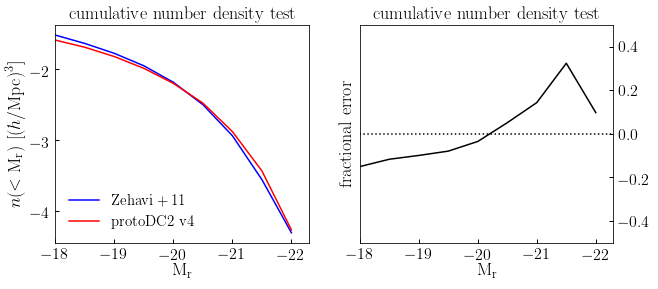

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

__=ax1.plot(lumthresh_h1p0, np.log10(cumnd_sdss), label=r'${\rm Zehavi+11}$', color='blue')
__=ax1.plot(lumthresh_h1p0, np.log10(cumnd_pdc2_v4), 
            label=r'${\rm protoDC2\ v4}$', color='red')

fracdiff_pdc2_v4 = (cumnd_pdc2_v4 - cumnd_sdss)/cumnd_sdss

__=ax2.plot(lumthresh_h1p0, fracdiff_pdc2_v4, 
            label=r'${\rm protoDC2\ v4}$', color='k')
__=ax2.plot(np.linspace(-100, 100, 100), np.zeros(100), ':', color='k')

legend = ax1.legend()
xlabel = ax1.set_xlabel(r'${\rm M_{r}}$')
xlabel2 = ax2.set_xlabel(r'${\rm M_{r}}$')
ylabel2 = ax2.set_ylabel(r'${\rm fractional\ error}$')
ylabel = ax1.set_ylabel(r'$n(<{\rm M_r})\ [(h/{\rm Mpc})^3]$')
title1 = ax1.set_title(r'${\rm cumulative\ number\ density\ test}$')
title2 = ax2.set_title(r'${\rm cumulative\ number\ density\ test}$')
ax2.yaxis.tick_right()  
xlim1 = ax1.set_xlim(-18, -22.3)
ylim2 = ax2.set_ylim(-0.5, 0.5)

So our luminosity function is calibrated to the $25\%$ level with SDSS over the r-band range $M_{\rm r}\in[-22, -18]$. 

## Compare luminosity threshold clustering to Zehavi+11

In [7]:
from cosmodc2.mock_diagnostics import zehavi_wp

period = mock.Lbox
x, y, z, vz = mock['x'], mock['y'], mock['z'], mock['vz']
magr = mock['restframe_extincted_sdss_abs_magr']

rp_mids, wp_v4_19p0 = zehavi_wp(x, y, z, vz, 
            period, magr, -19.0, protoDC2_littleh)
rp_mids, wp_v4_19p5 = zehavi_wp(x, y, z, vz, 
            period, magr, -19.5, protoDC2_littleh)
rp_mids, wp_v4_20p5 = zehavi_wp(x, y, z, vz, 
            period, magr, -20.5, protoDC2_littleh)
rp_mids, wp_v4_21p5 = zehavi_wp(x, y, z, vz, 
            period, magr, -21.5, protoDC2_littleh)


...calculating wp for 4.00e+05 galaxies and Mr < -19.0
...calculating wp for 4.01e+05 galaxies and Mr < -19.5
...calculating wp for 4.00e+05 galaxies and Mr < -20.5
...calculating wp for 4.64e+04 galaxies and Mr < -21.5


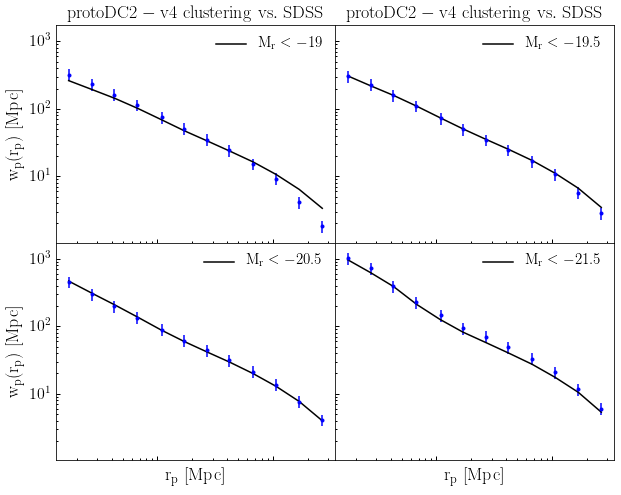

In [8]:
from cosmodc2.sdss_colors.sdss_measurements import rp as rp_zehavi
from cosmodc2.sdss_colors import zehavi11_clustering

wp_zehavi_18p5 = zehavi11_clustering(-18.5)
wp_zehavi_19p0 = zehavi11_clustering(-19.0)
wp_zehavi_19p5 = zehavi11_clustering(-19.5)
wp_zehavi_20p0 = zehavi11_clustering(-20.0)
wp_zehavi_20p5 = zehavi11_clustering(-20.5)
wp_zehavi_21p0 = zehavi11_clustering(-21.0)
wp_zehavi_21p5 = zehavi11_clustering(-21.5)

fig, _axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

((ax1, ax2), (ax3, ax4)) = _axes
axes = ax1, ax2, ax3, ax4
for ax in axes:
    __=ax.loglog()


__=ax1.plot(rp_mids, wp_v4_19p0,  color='k', label=r'${\rm M_{r} < -19}$')
__=ax1.errorbar(rp_zehavi, wp_zehavi_19p0, 0.2*wp_zehavi_19p0, 
               fmt='.', color='blue')

__=ax2.plot(rp_mids, wp_v4_19p5,  color='k', label=r'${\rm M_{r} < -19.5}$')
__=ax2.errorbar(rp_zehavi, wp_zehavi_19p5, 0.2*wp_zehavi_19p5, 
               fmt='.', color='blue')

__=ax3.plot(rp_mids, wp_v4_20p5,  color='k', label=r'${\rm M_{r} < -20.5}$')
__=ax3.errorbar(rp_zehavi, wp_zehavi_20p5, 0.2*wp_zehavi_20p5, 
               fmt='.', color='blue')

__=ax4.plot(rp_mids, wp_v4_21p5,  color='k', label=r'${\rm M_{r} < -21.5}$')
__=ax4.errorbar(rp_zehavi, wp_zehavi_21p5, 0.2*wp_zehavi_21p5, 
               fmt='.', color='blue')

for ax in axes:
    leg = ax.legend()

title1 = ax1.set_title(r'${\rm protoDC2-v4\ clustering\ vs.\ SDSS}$')
title2 = ax2.set_title(r'${\rm protoDC2-v4\ clustering\ vs.\ SDSS}$')

xlabel3 = ax3.set_xlabel(r'${\rm r_p\ [Mpc]}$')
xlabel4 = ax4.set_xlabel(r'${\rm r_p\ [Mpc]}$')
ylabel1 = ax1.set_ylabel(r'${\rm w_p(r_p)\ [Mpc]}$')
ylabel3 = ax3.set_ylabel(r'${\rm w_p(r_p)\ [Mpc]}$')

__=ax1.set_xticklabels([''])
__=ax2.set_xticklabels([''])

Well that looks good in a log-log plot, so let's look at $r_{\rm p}w_{\rm p}$ to bring out the discrepancies.

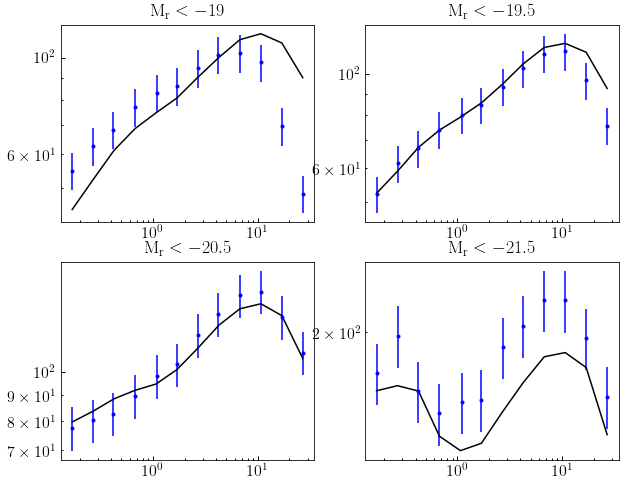

In [9]:
from cosmodc2.sdss_colors.sdss_measurements import rp as rp_zehavi
from cosmodc2.sdss_colors import zehavi11_clustering

wp_zehavi_18p5 = zehavi11_clustering(-18.5)
wp_zehavi_19p0 = zehavi11_clustering(-19.0)
wp_zehavi_19p5 = zehavi11_clustering(-19.5)
wp_zehavi_20p0 = zehavi11_clustering(-20.0)
wp_zehavi_20p5 = zehavi11_clustering(-20.5)
wp_zehavi_21p0 = zehavi11_clustering(-21.0)
wp_zehavi_21p5 = zehavi11_clustering(-21.5)

fig, _axes = plt.subplots(2, 2, figsize=(10, 8))
((ax1, ax2), (ax3, ax4)) = _axes
axes = ax1, ax2, ax3, ax4
for ax in axes:
    __=ax.loglog()


fake_error = 0.1
__=ax1.plot(rp_mids, rp_mids*wp_v4_19p0,  color='k')
__=ax1.errorbar(rp_zehavi, rp_zehavi*wp_zehavi_19p0, rp_zehavi*fake_error*wp_zehavi_19p0, 
               fmt='.', color='blue')

__=ax2.plot(rp_mids, rp_mids*wp_v4_19p5,  color='k')
__=ax2.errorbar(rp_zehavi, rp_zehavi*wp_zehavi_19p5, rp_zehavi*fake_error*wp_zehavi_19p5, 
               fmt='.', color='blue')

__=ax3.plot(rp_mids, rp_mids*wp_v4_20p5,  color='k')
__=ax3.errorbar(rp_zehavi, rp_zehavi*wp_zehavi_20p5, rp_zehavi*fake_error*wp_zehavi_20p5, 
               fmt='.', color='blue')

__=ax4.plot(rp_mids, rp_mids*wp_v4_21p5,  color='k')
__=ax4.errorbar(rp_zehavi, rp_zehavi*wp_zehavi_21p5, rp_zehavi*fake_error*wp_zehavi_21p5, 
               fmt='.', color='blue')


title1 = ax1.set_title(r'${\rm M_{r} < -19}$')
title2 = ax2.set_title(r'${\rm M_{r} < -19.5}$')
title3 = ax3.set_title(r'${\rm M_{r} < -20.5}$')
title4 = ax4.set_title(r'${\rm M_{r} < -21.5}$')


Large-scale clustering is too strong at the faint end, and the one-to-two halo transition is too weak at the bright end; otherwise, looks pretty good. 

## Inspect the cluster halo CLF

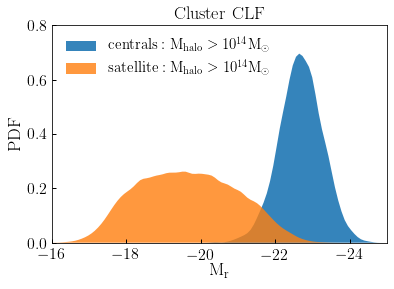

In [10]:
cenmask = mock['upid'] == -1
lowm, highm = 14., np.inf
halo_mask = (mock['host_halo_mvir'] > 10**lowm) & (mock['host_halo_mvir'] < 10**highm)

num_clusters = np.count_nonzero(cenmask & halo_mask)

fig, ax = plt.subplots(1, 1)

from scipy.stats import gaussian_kde
kde_sats = gaussian_kde(mock['restframe_extincted_sdss_abs_magr'][halo_mask & ~cenmask])
kde_cens = gaussian_kde(mock['restframe_extincted_sdss_abs_magr'][halo_mask & cenmask])

x = np.linspace(-12, -25, 150)
sats_pdf = kde_sats.evaluate(x)
cens_pdf = kde_cens.evaluate(x)

__=ax.fill(x, cens_pdf, alpha=0.9, 
           label=r'${\rm centrals: M_{halo} > 10^{14}M_{\odot}}$')
__=ax.fill(x, sats_pdf, alpha=0.8, 
           label=r'${\rm satellite: M_{halo} > 10^{14}M_{\odot}}$')

legend = ax.legend(loc='upper left')

ylim = ax.set_ylim(0, 0.8)
xlim = ax.set_xlim(-16, -25)
xlabel = ax.set_xlabel(r'${\rm M_{\rm r}}$')
ylabel = ax.set_ylabel(r'${\rm PDF}$')
title = ax.set_title(r'${\rm Cluster\ CLF$')

## $\langle M_{\ast}\vert M_{\rm halo}\rangle$ relation

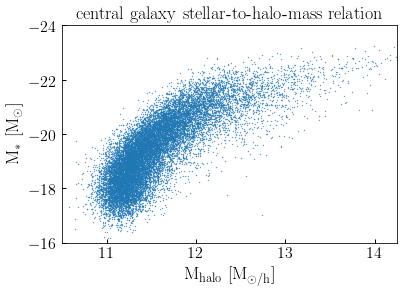

In [11]:
fig, ax = plt.subplots(1, 1)

cenmask = mock['upid'] == -1
num_cens = np.count_nonzero(cenmask)
nskip = 200
__=ax.scatter(np.log10(mock['mpeak'][cenmask][::nskip]), 
              mock['restframe_extincted_sdss_abs_magr'][cenmask][::nskip],
             s=0.1)

ylim = ax.set_ylim(-16, -24)
xlim = ax.set_xlim(10.5, 14.25)

xlabel = ax.set_xlabel(r'${\rm M_{\rm halo}\ [M_{\odot/h}]}$')
ylabel = ax.set_ylabel(r'${\rm M_{\ast}\ [M_{\odot}]}$')
title = ax.set_title(r'${\rm central\ galaxy\ stellar}$-${\rm to}$-${\rm halo}$-${\rm mass\ relation}$')